x = 0.957782
y = 0.289565
λ = -4.07789
f(x, y) = -3.16222
[-5.472879971220401, 2.695722106365952]
[-5.43656365691809, 2.718281828459045]
[[-1.   -0.95 -0.9  ...  0.85  0.9   0.95]
 [-1.   -0.95 -0.9  ...  0.85  0.9   0.95]
 [-1.   -0.95 -0.9  ...  0.85  0.9   0.95]
 ...
 [-1.   -0.95 -0.9  ...  0.85  0.9   0.95]
 [-1.   -0.95 -0.9  ...  0.85  0.9   0.95]
 [-1.   -0.95 -0.9  ...  0.85  0.9   0.95]]


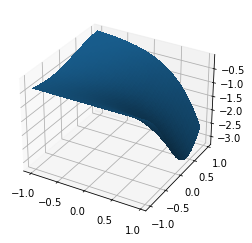

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.misc import derivative

# First we define the functions, YOU SHOULD IMPLEMENT THESE
def f (x, y) :
    return -np.exp(x-y*y+x*y)

def g (x, y) :
    return np.cosh(y)+x-2

# Next their derivatives, YOU SHOULD IMPLEMENT THESE
def dfdx (x, y) :
    return (1+y)*f(x,y)

def dfdy (x, y) :
    return (-2*y+x)*f(x,y)

def dgdx (x, y) :
    return 1

def dgdy (x, y) :
    return np.sinh(y)

# Use the definition of DL from previously.
def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

# To score on this question, the code above should set
# the variables x, y, λ, to the values which solve the
# Langrange multiplier problem.

# I.e. use the optimize.root method, as you did previously.

x, y, λ = optimize.root(DL,[3,3,0]).x

print("x = %g" % x)
print("y = %g" % y)
print("λ = %g" % λ)
print("f(x, y) = %g" % f(x, y))

X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)
print([derivative(lambda u:f(1+u,1),0,dx=.1),derivative(lambda v:f(1,1+v),0,dx=.1)])
print([dfdx(1,1),dfdy(1,1)])
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, 
                       linewidth=0, antialiased=False)
print(X)